In [23]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [24]:
df = pd.DataFrame()

In [25]:
df['x1'] = [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
df['x2'] = [1, 3, 8, 6, 1, 3, 8, 6, 1, 3]
df['label'] = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [26]:
df

,x1,x2,label
0,1,1,0
1,1,3,1
2,2,8,0
3,2,6,1
4,3,1,0
5,3,3,1
6,4,8,0
7,4,6,1
8,5,1,0
9,5,3,1


<Axes: xlabel='x1', ylabel='x2'>

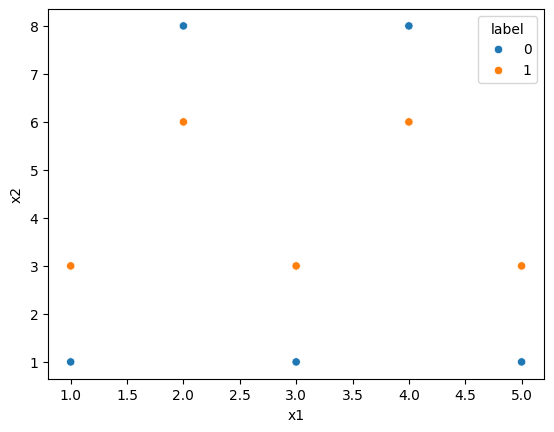

In [27]:
import seaborn as sns
sns.scatterplot(x='x1', y='x2', hue='label', data=df)

In [28]:
df['weights'] = 1/df.shape[0]

In [29]:
df

,x1,x2,label,weights
0,1,1,0,0.1
1,1,3,1,0.1
2,2,8,0,0.1
3,2,6,1,0.1
4,3,1,0,0.1
5,3,3,1,0.1
6,4,8,0,0.1
7,4,6,1,0.1
8,5,1,0,0.1
9,5,3,1,0.1


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [37]:
x = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

In [38]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x2 <= 2.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.625, 0.5, '  False')]

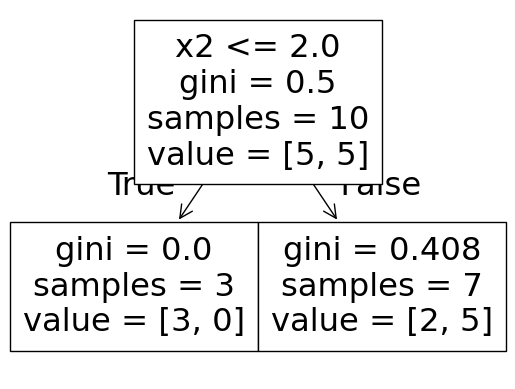

In [39]:
from sklearn.tree import plot_tree
plot_tree(dt1, feature_names=['x1', 'x2'])

<Axes: >

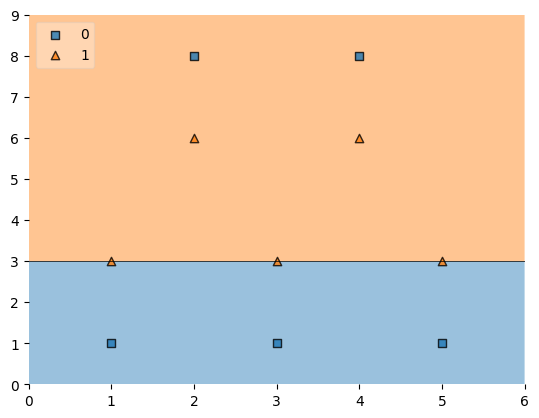

In [40]:
plot_decision_regions(x,y,clf=dt1, legend=2)

In [42]:
df['y_pred'] = dt1.predict(x)

In [43]:
df

,x1,x2,label,weights,y_pred
0,1,1,0,0.1,0
1,1,3,1,0.1,1
2,2,8,0,0.1,1
3,2,6,1,0.1,1
4,3,1,0,0.1,0
5,3,3,1,0.1,1
6,4,8,0,0.1,1
7,4,6,1,0.1,1
8,5,1,0,0.1,0
9,5,3,1,0.1,1


In [45]:
df['label'] - df['y_pred']
# error

0    0
1    0
2   -1
3    0
4    0
5    0
6   -1
7    0
8    0
9    0
dtype: int64

In [47]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [48]:
alpha1 = calculate_model_weight((df['label'] != df['y_pred']).mean())
alpha1

0.6931471805599453

In [49]:
def  update_row_weights(row, alpha = alpha1):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [50]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [51]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,1,0,0.1,0,0.05
1,1,3,1,0.1,1,0.05
2,2,8,0,0.1,1,0.20
3,2,6,1,0.1,1,0.05
4,3,1,0,0.1,0,0.05
5,3,3,1,0.1,1,0.05
6,4,8,0,0.1,1,0.20
7,4,6,1,0.1,1,0.05
8,5,1,0,0.1,0,0.05
9,5,3,1,0.1,1,0.05


In [52]:
df['updated_weights'].sum()

0.8

In [53]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [54]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,1,0,0.1,0,0.05,0.0625
1,1,3,1,0.1,1,0.05,0.0625
2,2,8,0,0.1,1,0.20,0.2500
3,2,6,1,0.1,1,0.05,0.0625
4,3,1,0,0.1,0,0.05,0.0625
5,3,3,1,0.1,1,0.05,0.0625
6,4,8,0,0.1,1,0.20,0.2500
7,4,6,1,0.1,1,0.05,0.0625
8,5,1,0,0.1,0,0.05,0.0625
9,5,3,1,0.1,1,0.05,0.0625


In [55]:
df['normalized_weights'].sum()

1.0

In [57]:
df['cumsum_upper'] = df['normalized_weights'].cumsum()
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [59]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,1,0,0.1,0,0.05,0.0625,0.0625,0.0000
1,1,3,1,0.1,1,0.05,0.0625,0.1250,0.0625
2,2,8,0,0.1,1,0.20,0.2500,0.3750,0.1250
3,2,6,1,0.1,1,0.05,0.0625,0.4375,0.3750
4,3,1,0,0.1,0,0.05,0.0625,0.5000,0.4375
5,3,3,1,0.1,1,0.05,0.0625,0.5625,0.5000
6,4,8,0,0.1,1,0.20,0.2500,0.8125,0.5625
7,4,6,1,0.1,1,0.05,0.0625,0.8750,0.8125
8,5,1,0,0.1,0,0.05,0.0625,0.9375,0.8750
9,5,3,1,0.1,1,0.05,0.0625,1.0000,0.9375


In [64]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] >a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [69]:
index_values = create_new_dataset(df)
index_values

[6, 6, 6, 8, 6, 1, 8, 6, 6, 8]

In [67]:
df2 = df.loc[index_values, ['x1', 'x2', 'label', 'weights']]

In [68]:
df2

,x1,x2,label,weights
1,1,3,1,0.1
9,5,3,1,0.1
6,4,8,0,0.1
9,5,3,1,0.1
7,4,6,1,0.1
6,4,8,0,0.1
5,3,3,1,0.1
2,2,8,0,0.1
2,2,8,0,0.1
6,4,8,0,0.1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
x, y = make_circles(n_samples=1000, noise=0.35, factor=0.1, random_state=42)

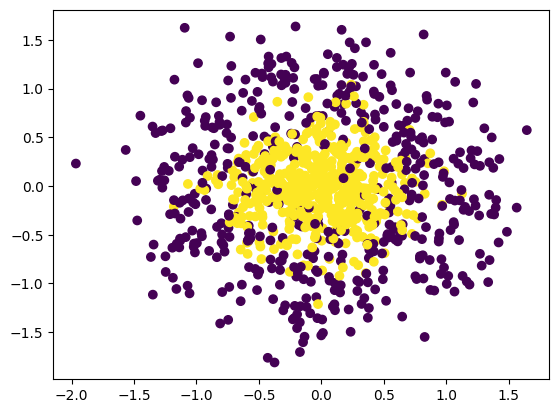

In [3]:
plt.scatter(x[:,0], x[:,1], c=y)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

In [5]:
np.mean(cross_val_score(abc, x, y, cv=10, scoring='accuracy'))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

0.8240000000000001

In [6]:
abc.fit(x,y)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [7]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    x_range = np.linspace(x[:,0].min(), x[:,0].max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(x[:,0], x[:,1], c=y, alpha=0.7)
    plt.title("Adaboost Classifier Decision Boundary")
    plt.show()

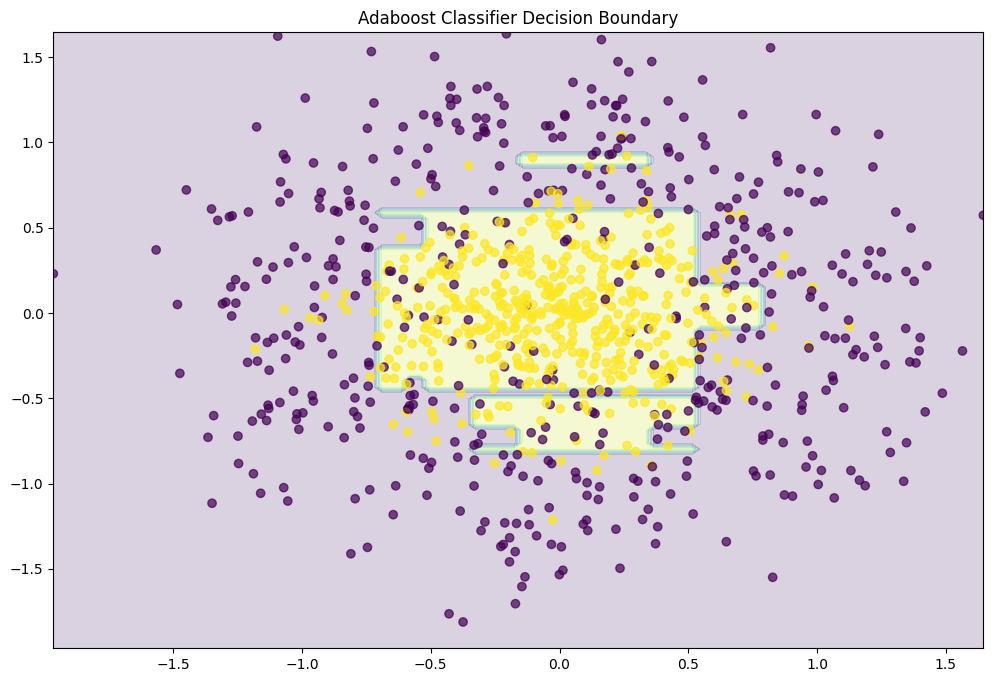

In [8]:
plot_decision_boundary(abc)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


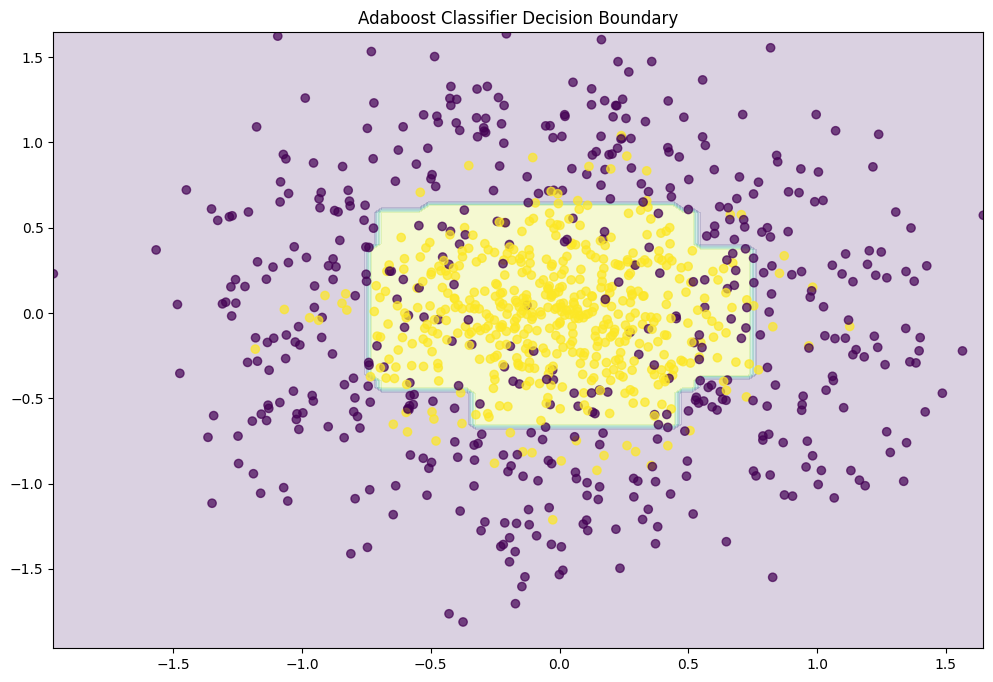

In [11]:
abc = AdaBoostClassifier(n_estimators=1000, learning_rate=0.01)
abc.fit(x,y)
plot_decision_boundary(abc)

In [13]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [1, 10, 50, 100, 500, 1000]
grid['learning_rate'] = [0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv = 10, scoring='accuracy')
grid_result = grid_search.fit(x,y)
print("Best %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best 0.849000 using {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


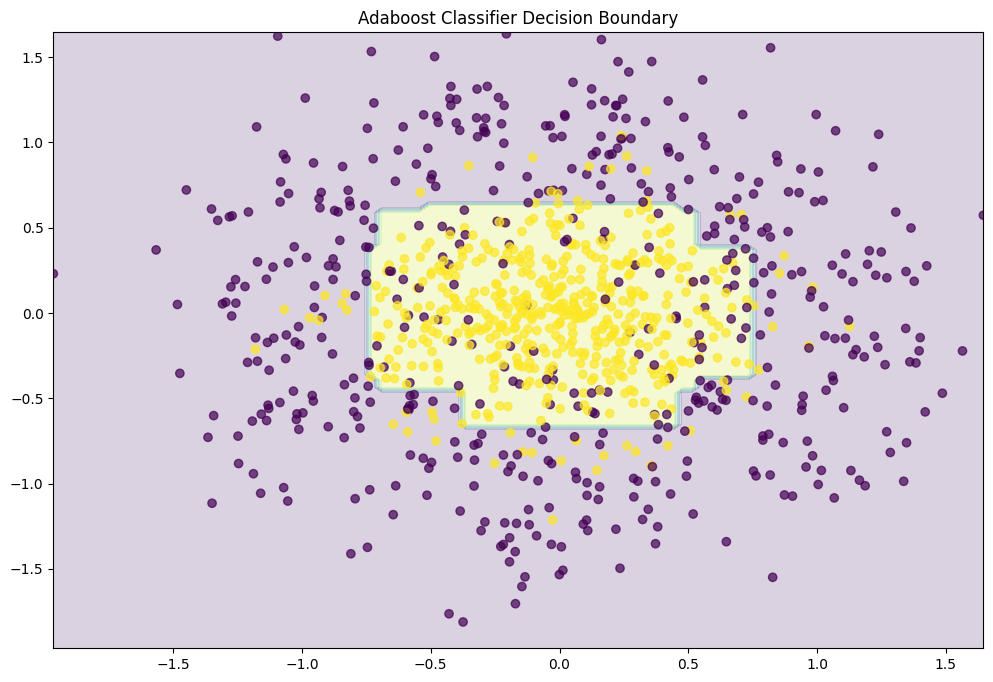

In [14]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, algorithm="SAMME.R")
abc.fit(x,y)
plot_decision_boundary(abc)